## Conversion to fif: LL10

This script takes the raw, original data file we recieved from WashU and converts it to a fif file with the photodiode as a new stim channel

Just need to change fields in `prep_paths`

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal, stats
import mat73
import re
from neurodsp.timefrequency import compute_wavelet_transform
from BCI2kReader import BCI2kReader as b2k
import os
import mne
from tabulate import tabulate
import IPython
import seaborn as sns

In [5]:
## prep paths

subject = 'LL10'
orig_data_fi = '/home/brooke/knight_server/remote/ecog/DATA_FOLDER/Loma_Linda/LL10/Datafiles/BCI/DAY1/PacmanTask/LL10001/LL10S001R01.dat'
raw_data_dir = f"/home/brooke/pacman/raw_data/{subject}/ieeg"

In [6]:
## load data

with b2k.BCI2kReader(orig_data_fi) as data: #opens a stream to the dat file
    my_signals = data.signals
    my_states = data.states
    my_params = data.parameters

 ...]

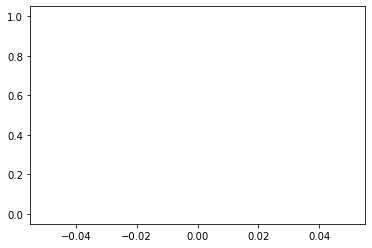

In [9]:
plt.plot(my_states['Dying'])

In [7]:
## check structure if necessary

my_states
# my_params

{'GhostLocation': array([[  0,   0,   0, ..., 132, 132, 132]], dtype=int32),
 'UserLocation': array([[ 0,  0,  0, ..., 50, 50, 50]], dtype=int32),
 'Direction': array([[ 4,  4,  4, ..., 11, 11, 11]], dtype=int32),
 'Biscuit1': array([[0, 0, 0, ..., 1, 1, 1]], dtype=int32),
 'Biscuit2': array([[0, 0, 0, ..., 1, 1, 1]], dtype=int32),
 'Biscuit3': array([[0, 0, 0, ..., 1, 1, 1]], dtype=int32),
 'Biscuit4': array([[0, 0, 0, ..., 1, 1, 1]], dtype=int32),
 'Biscuit5': array([[0, 0, 0, ..., 1, 1, 1]], dtype=int32),
 'Attack': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32),
 'Chase': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32),
 'Dying': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32),
 'Eaten': array([[0, 0, 0, ..., 5, 5, 5]], dtype=int32),
 'Score': array([[  0,   0,   0, ..., 220, 220, 220]], dtype=int32),
 'Lives': array([[3, 3, 3, ..., 3, 3, 3]], dtype=int32),
 'TrialType': array([[ 0,  0,  0, ..., 14, 14, 14]], dtype=int32),
 'Trial_on_off': array([[0, 0, 0, ..., 1, 1, 1]], dtype=int32),


In [7]:
## create info field 

info = mne.create_info(ch_names = my_params['ChannelNames'],
                       sfreq = my_params['SamplingRate'],
                       ch_types = 'seeg')

info

<Info | 7 non-empty values
 bads: []
 ch_names: CH0, CH1, CH2, CH3, CH4, CH5, CH6, CH7, CH8, CH9, CH10, CH11, ...
 chs: 148 sEEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: unspecified
 nchan: 148
 projs: []
 sfreq: 512.0 Hz
>

In [8]:
## create mne object
mne_df = mne.io.RawArray(my_signals, info)

Creating RawArray with float64 data, n_channels=148, n_times=1559660
    Range : 0 ... 1559659 =      0.000 ...  3046.209 secs
Ready.


In [9]:
## create stim channel and add it to mne object

info = mne.create_info(['STI'], my_params['SamplingRate'], ['stim'])
stim_raw = mne.io.RawArray( my_states['Trial_on_off'], info)
mne_df.add_channels([stim_raw], force_update_info=True)

Creating RawArray with float64 data, n_channels=1, n_times=1559660
    Range : 0 ... 1559659 =      0.000 ...  3046.209 secs
Ready.


<RawArray | 149 x 1559660 (3046.2 s), ~1.73 GB, data loaded>

In [14]:
## save it

mne_df.save(f"{raw_data_dir}/{subject}_raw_ieeg.fif", overwrite = False)

Writing /home/brooke/pacman/raw_data/LL10/ieeg/LL10_raw_ieeg.fif
Closing /home/brooke/pacman/raw_data/LL10/ieeg/LL10_raw_ieeg.fif
[done]
